In [2]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:


# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

In [4]:


# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
#This Dataset is highly unblanced

#0 --> Normal Transaction

#1 --> fraudulent transaction

In [10]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [11]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [12]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [15]:
#Under-Sampling

#Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

#Number of Fraudulent Transactions --> 492

In [16]:
legit_sample = legit.sample(n=492)

In [17]:
#Concatenating two DataFrames

In [18]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)


In [19]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
64575,51208.0,1.384719,-1.697884,1.730340,-0.749316,-2.620070,0.282981,-2.080708,0.290853,-0.032424,...,-0.253997,0.101861,-0.021848,0.397250,0.367904,-0.024485,0.111083,0.031928,17.00,0
200276,133368.0,-1.952688,0.665167,1.716223,0.951378,-0.818139,1.805204,-0.299761,0.916901,0.684711,...,-0.099803,0.165693,-0.374975,0.297583,0.608344,-0.391337,0.215877,0.133290,130.00,0
220902,142344.0,0.969351,-1.858405,-1.611553,0.870084,-0.584439,0.026677,0.162527,-0.149927,0.929710,...,0.499837,0.446199,-0.385024,0.432139,-0.336843,0.570482,-0.107948,0.076613,549.20,0
45671,42452.0,-1.663978,0.480569,0.522874,-0.315511,1.136668,2.180612,-0.311448,1.272297,-0.108830,...,-0.091541,-0.011584,-0.233821,-2.150940,-0.180545,0.429056,0.440322,0.023670,32.87,0
78527,57573.0,-4.501629,3.296037,-0.810705,-0.886245,-1.973552,-0.858305,-1.137554,1.438570,0.665890,...,0.324504,-0.423721,0.304898,0.499985,-0.393483,0.017795,-2.917025,-0.259384,4.00,0


In [20]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [21]:
new_dataset['Class'].value_counts()


Class
0    492
1    492
Name: count, dtype: int64

In [22]:
new_dataset.groupby('Class').mean()
     

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93554.026423,-0.182529,-0.048021,0.040056,-0.077671,-0.097663,0.120805,-0.026150,0.004083,0.057801,...,0.007757,0.024783,0.013134,0.027483,-0.03931,0.028745,0.008465,-0.025281,0.025305,105.562785
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


In [23]:
#Splitting the data into Features & Targets

In [24]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [25]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
64575    51208.0  1.384719 -1.697884  1.730340 -0.749316 -2.620070  0.282981   
200276  133368.0 -1.952688  0.665167  1.716223  0.951378 -0.818139  1.805204   
220902  142344.0  0.969351 -1.858405 -1.611553  0.870084 -0.584439  0.026677   
45671    42452.0 -1.663978  0.480569  0.522874 -0.315511  1.136668  2.180612   
78527    57573.0 -4.501629  3.296037 -0.810705 -0.886245 -1.973552 -0.858305   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [26]:
print(Y)

64575     0
200276    0
220902    0
45671     0
78527     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [27]:
#Split the data into Training data & Testing Data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [29]:
print(X.shape, X_train.shape, X_test.shape)


(984, 30) (787, 30) (197, 30)


In [30]:
#Model Training

#Logistic Regression

In [31]:
lr_model = LogisticRegression(
    C=0.01,                 # stronger regularization
    max_iter=1000,
    random_state=42
)
     

In [32]:
lr_model.fit(X_train, Y_train)

d:\creditcard\venv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [33]:
#Random Forest Classifier

In [34]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [35]:
rf_model = RandomForestClassifier(
    n_estimators=300,         # more trees
    max_depth=20,             # deep enough to learn patterns
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

In [36]:
rf_model.fit(X_train, Y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,20
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:

#Model Evaluation

#Logistic Regression Accuracy Score

In [38]:

# accuracy on training data
lr_prediction = lr_model.predict(X_train)
lr_accuracy = accuracy_score(lr_prediction, Y_train)

In [39]:


print('Accuracy on Training data : ', lr_accuracy)

Accuracy on Training data :  0.9428208386277002


In [40]:

# accuracy on test data
lr_prediction = lr_model.predict(X_test)
lr_accuracy = accuracy_score(lr_prediction, Y_test)

In [41]:

print('Accuracy score on Test Data : ', lr_accuracy)

Accuracy score on Test Data :  0.9187817258883249


In [42]:
#Random Forest Classifier Accuracy Score

In [43]:
# accuracy on training data
rf_predictions = rf_model.predict(X_train)
rf_accuracy = accuracy_score(rf_predictions, Y_train)

In [44]:
print('Accuracy on Training data : ', rf_accuracy)

Accuracy on Training data :  0.9898348157560356


In [45]:

# accuracy on test data
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(Y_test, rf_predictions)

In [46]:
print("Accuracy score on Test Data: ", rf_accuracy)

Accuracy score on Test Data:  0.9187817258883249


In [47]:
#Model Comparison

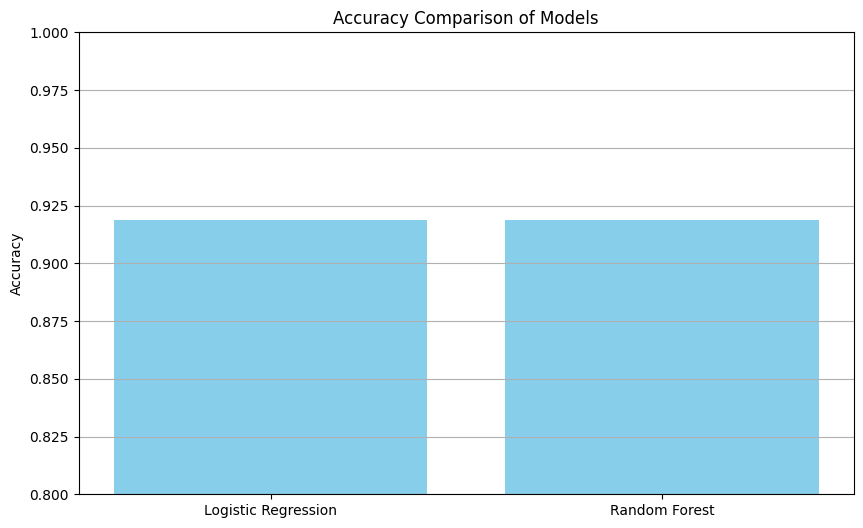

In [49]:
model_names = ['Logistic Regression', 'Random Forest']
model_accuracies = [lr_accuracy, rf_accuracy]

plt.figure(figsize=(10,6))
plt.bar(model_names, model_accuracies, color='skyblue')
plt.title('Accuracy Comparison of Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.grid(axis='y')
plt.show()

In [50]:

from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression Evaluation
lr_preds = lr_model.predict(X_test)
print("Logistic Regression:\n", classification_report(Y_test, lr_preds))
print(confusion_matrix(Y_test, lr_preds))

# Random Forest Evaluation
rf_preds = rf_model.predict(X_test)
print("Random Forest:\n", classification_report(Y_test, rf_preds))
print(confusion_matrix(Y_test, rf_preds))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92        99
           1       0.98      0.86      0.91        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

[[97  2]
 [14 84]]
Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        99
           1       0.97      0.87      0.91        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

[[96  3]
 [13 85]]


In [51]:
import pickle

# Save the Logistic Regression model (lr_model)
# We choose Logistic Regression over Random Forest because the file size is much smaller
# and safer for GitHub/Streamlit deployment limits.
filename = 'fraud_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(lr_model, file)

print(f"Model saved successfully as {filename}")

Model saved successfully as fraud_model.pkl
